In [228]:
import pickle
import spacy
import scattertext as st
import re

import spacy
#from spacy import displacy
#from spacy.symbols import amod
from spacy.lang.en.stop_words import STOP_WORDS

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances

import pyLDAvis
import pyLDAvis.sklearn

import pandas as pd
import numpy as np

import swat
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nltk
#nltk.download()
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

/Users/elena/opt/anaconda3/lib/python3.7/site-packages/nltk/decorators.py:68: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  regargs, varargs, varkwargs, defaults, formatvalue=lambda value: ""
/Users/elena/opt/anaconda3/lib/python3.7/site-packages/nltk/lm/counter.py:15: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence, defaultdict
/Users/elena/opt/anaconda3/lib/python3.7/site-packages/nltk/lm/vocabulary.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Counter, Iterable


In [154]:
with open('blogger_com_data_19320_&_clean.pkl', 'rb') as picklefile:
    df = pickle.load(picklefile)

In [155]:
df.head()

,blogger_id,gender,age,occupation,name,post,len_post
0,1000331,female,37,indUnk,Leo,My four-year old never stops talking. ...,4583
1,1000866,female,17,Student,Libra,"Yes, I did say goodbye to my friends an...",335483
2,1004904,male,23,Arts,Capricorn,if she wants me too then I will go to h...,677
3,1005076,female,25,Arts,Cancer,"The following things about last night ""...",15222
4,1005545,male,25,Engineering,Sagittarius,Blogdex Blogdex is a research pro...,52454


In [238]:
df.shape

(19320, 7)

In [359]:
df_toy=df.loc[:19321,:]

In [240]:
#df['post'].apply(strip)

In [355]:
df_toy['post1'] = df_toy['post'].apply(lambda x: x[:5000])

In [356]:
stop_words = set(stopwords.words('english'))

def remove_stop_words(comment_line):
    token_words=word_tokenize(str(comment_line))
    filtered_comment_line = [w for w in token_words if not w in stop_words] 
    
    return " ".join(filtered_comment_line)

In [357]:
alphanumeric = lambda x: re.sub(r'\b[0-9]+\b\W*', '', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
#re.sub(r'\b[0-9]+\b\W*', '', text)

In [358]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemma_series(string):
    return lemmatizer.lemmatize(string)

In [377]:
lemma_series('wife')

'wife'

In [360]:
df_toy['post'] = df_toy['post'].map(remove_stop_words).map(alphanumeric).map(punc_lower)

In [361]:
df_toy['post'] = df_toy['post'].map(lemma_series)

In [ ]:
Topic  2
time, work, got, day, going, good, today, night, really, went, home, like, week, new

Topic  3
den, haha, dun, haiz, tt, mi, tat, juz, wif, wat, le, liao, wad, lor

Topic  4
bush, people, kerry, war, iraq, president, world, american, government, new, country, america, com, like

Topic  5
lol, like, got, went, na, really, yeah, gon, today, fun, oh, cuz, know, school

Topic  6
ko, sa, ng, na, ako, ang, lang, naman, mga, pa, yung, hindi, pero, ka

In [378]:
my_stop_words_lst = ['[detail]', 'so', 's', 'it', 'he', 'its', 'she', 'we', 'n', 'm', 've', 'things', 'really', 'say', 
                    'im', 'dont', 'thats', 'ive', 'didnt', 'hes', 'doesnt', 'havent', 'like', 'wont', 'na', 'shes', 'wasnt',
                    'den', 'haha', 'dun', 'haiz', 'tt', 'mi', 'tat', 'juz', 'wif', 'wat', 'le', 'liao', 'com', 'www', 
                    'got', 'na', 'yeah', 'gon', 'today',  'oh', 'cuz', 
                     'ko', 'sa', 'ng', 'na', 'ako', 'ang', 'mga', 'pa', 'yung',  'pero', 'ka',
                    'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz', 'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz', ]

for w in my_stop_words_lst:
    pattern = r'\b'+w+r'\b'
    custom_stop = lambda x: re.sub(pattern, ' ', x)
    df_toy['post'] = df_toy['post'].map(custom_stop)

In [370]:
df_toy.head()

,blogger_id,gender,age,occupation,name,post,len_post
0,1000331,female,37,indUnk,Leo,four year old never stops talking say mom say ...,4583
1,1000866,female,17,Student,Libra,yes say goodbye friends hour ago yes say would...,335483
2,1004904,male,23,Arts,Capricorn,wants go always choice cant make choice wants ...,677
3,1005076,female,25,Arts,Cancer,following things last night roxass tamales eye...,15222
4,1005545,male,25,Engineering,Sagittarius,blogdex blogdex research project mit media lab...,52454


In [379]:
with open('blogger_com_data_19320_&_clean.pkl', 'rb') as picklefile:
    df = pickle.load(picklefile)

FileNotFoundError: [Errno 2] No such file or directory: 'blogger_com_data_19320_&_clean_v2.pkl'

In [166]:
#nlp = spacy.load('en')

In [167]:
#len(STOP_WORDS)

326

In [168]:
# my_stop_words_list = []
# for word in my_stop_words_list:
#     spacy.lang.en.stop_words.STOP_WORDS.add(word)
#     nlp.vocab[word].is_stop = True

In [169]:
# df_toy['post1'] = df_toy.post.apply(
#     lambda text: ' '.join(token.orth_ for token in nlp(text) if not token.is_punct))

In [170]:
# df_toy['post1'] = df_toy.post.apply(
#     lambda text: ' '.join(token.lemma_ for token in nlp(text) if not token.is_stop))

In [195]:
# df_toy['post1'] = df_toy['post1'].apply(lambda text: re.sub(r'\b[0-9]+\b\W*', '', text))

In [172]:
#doc = nlp(df['post'].values[0])

In [ ]:
#

In [173]:
#df['spacy_doc'] = list(nlp.pipe(df.post))

In [174]:
#adj = [token.text.lower() for doc in df.spacy_doc for token in doc if token.pos_=='ADJ']
#noun = [token.text.lower() for doc in df.spacy_doc for token in doc if token.pos_=='NOUN']

In [175]:
#Counter(adj).most_common(12)
#Counter(noun).most_common(12)

# Scattertext

In [371]:
 corpus = st.CorpusFromPandas(df_toy,
                              category_col='gender',
                              text_col='post',
                              nlp=st.whitespace_nlp_with_sentences
                             ).build()
html1 = st.produce_scattertext_explorer(
     corpus,
     category='male',
     category_name='Male',
     not_category_name='Female',
     minimum_term_frequency=5,
     pmi_threshold_coefficient=4,
     width_in_pixels=1000,
     #metadata=df1['prime_tag']
     metadata=corpus.get_df()['occupation']
     )

KeyboardInterrupt: 

In [ ]:
open('demo_gender.html', 'wb').write(html1.encode('utf-8'));

# LDA Pyviz

In [250]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,                        # minimum reqd occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             max_features=1000,                # max number of uniq words
                            )

data_vectorized = vectorizer.fit_transform(df_toy.post1)

In [251]:
n_components = 10

lda_model = LatentDirichletAllocation(n_components=n_components,   # Number of topics
                                      max_iter=10,                 # Max learning iterations
                                      learning_method='online',   
                                      random_state=100,            # Random state
                                      #batch_size=128,             # n docs in each learning iter
                                      n_jobs = -1,                 # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

print(lda_model)  # Model attributes

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=-1,
                          perp_tol=0.1, random_state=100, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)


In [252]:
pyLDAvis.enable_notebook()

panel = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer)
panel

/Users/elena/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.011779 -0.080625       1        1  42.895526
6     -0.013184 -0.067342       2        1  28.569161
3      0.036731 -0.023673       3        1  12.511141
9      0.082388  0.040055       4        1   6.757418
0     -0.040590 -0.105339       5        1   5.491039
5      0.056849 -0.069960       6        1   2.646567
7      0.203327  0.197817       7        1   0.716413
1     -0.261404  0.176869       8        1   0.230566
2     -0.020342 -0.062044       9        1   0.126349
4     -0.031996 -0.005758      10        1   0.055822, topic_info=    Category         Freq    Term        Total  loglift  logprob
495  Default  3055.000000    like  3055.000000  30.0000  30.0000
154  Default   674.000000    come   674.000000  29.0000  29.0000
596  Default  1238.000000     new  1238.000000  28.0000  28.0000
874  Default  2234.000000    time  2234.000000  27.0000  27.0000
381  Default   424.000000   happy   424.000000  26.0000  26.0000
..       ...          ...     ...          ...      ...      ...
865  Topic10     0.119698  things  1000.872425  -1.5407  -6.7893
505  Topic10     0.118310  little   866.785748  -1.4085  -6.8010
729  Topic10     0.116729    said   744.632587  -1.2700  -6.8144
975  Topic10     0.116737    work  1091.829264  -1.6527  -6.8144
720  Topic10     0.116162   right   971.385503  -1.5407  -6.8193

[566 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
0         1  0.103126   000
0         2  0.117858   000
0         3  0.147322   000
0         4  0.132590   000
0         6  0.441967   000
...     ...       ...   ...
998       2  0.039056  york
998       3  0.208298  york
998       4  0.013019  york
998       5  0.117168  york
998       6  0.403578  york

[2123 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 7, 4, 10, 1, 6, 8, 2, 3, 5])

# Topic Modeling

In [380]:
def display_topics(model, feature_names, no_top_words, model_type = 'lsa_nmf_lda', topic_names=None):
    if model_type == 'lsa_nmf_lda':
        for ix, topic in enumerate(model.components_):
            if not topic_names or not topic_names[ix]:
                print("\nTopic ", ix)
            else:
                print("\nTopic: '",topic_names[ix],"'")
            print(", ".join([feature_names[i]
                            for i in topic.argsort()[:-no_top_words - 1:-1]]))
    elif model_type == 'corex':
        for ix, topic in enumerate(model.alpha):
            if not topic_names or not topic_names[ix]:
                print("\nTopic ", ix)
            else:
                print("\nTopic: '",topic_names[ix],"'")
            print(", ".join([feature_names[i]
                            for i in topic.argsort()[:-no_top_words - 1:-1]]))
    else:
        raise ValueError('Unknown model type')

In [381]:
vectorizer_TF_IDF = TfidfVectorizer(stop_words='english', max_df=1.0, min_df=2, strip_accents='ascii') 
doc_word_TF_IDF = vectorizer_TF_IDF.fit_transform(list(df_toy.post))
pd.DataFrame(doc_word_TF_IDF.toarray(), columns=vectorizer_TF_IDF.get_feature_names()).shape

(19320, 185844)

In [ ]:
dtm_TF_IDF = pd.DataFrame(doc_word_TF_IDF.toarray(), index=df_toy['blogger_id'], columns=vectorizer_TF_IDF.get_feature_names())
words_TF_IDF = list(np.asarray(vectorizer_TF_IDF.get_feature_names()))

In [375]:
nmf_model = NMF(10)
doc_topic = nmf_model.fit_transform(doc_word_TF_IDF)
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["component_1","component_2", "component_3","component_4", "component_5",
                     "component_6","component_7","component_8",
                     "component_9","component_10"],
             columns = vectorizer_TF_IDF.get_feature_names())
topic_word

,00,0001pt,000ft,000ish,000km,000lb,000m,000s,000sq,000th,...,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz
component_1,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
component_2,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.000,0.001,0.0,0.0,0.0,0.0,0.0,0.0
component_3,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
component_4,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
component_5,0.0,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001,...,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
component_6,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
component_7,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.001,0.000,0.0,0.0,0.0,0.0,0.0,0.0


In [376]:
display_topics(nmf_model, vectorizer_TF_IDF.get_feature_names(), 14)


Topic  0
know, love, life, like, want, people, think, feel, things, god, time, really, say, way

Topic  1
im, dont, thats, ive, didnt, ill, hes, doesnt, havent, like, wont, na, shes, wasnt

Topic  2
time, work, got, day, going, good, today, night, really, went, home, like, week, new

Topic  3
den, haha, dun, haiz, tt, mi, tat, juz, wif, wat, le, liao, wad, lor

Topic  4
bush, people, kerry, war, iraq, president, world, american, government, new, country, america, com, like

Topic  5
lol, like, got, went, na, really, yeah, gon, today, fun, oh, cuz, know, school

Topic  6
ko, sa, ng, na, ako, ang, lang, naman, mga, pa, yung, hindi, pero, ka


In [258]:
doc_topic_nmf = pd.DataFrame(doc_topic.round(5),
                             index=df_toy['blogger_id'],
                             columns = ["philosophical" ,"mundane", "fun","webb", "running",
                                       "developer","politics", "faith","jargon", "movie"])
doc_topic_nmf

,mundane,tech,social_bond,philosophical,running,developer,politics,faith,jargon,movie
blogger_id,,,,,,,,,,
1000331,0.00682,0.00000,0.02449,0.00096,0.01586,0.01228,0.18593,0.01879,0.00493,0.00000
1000866,0.08852,0.01904,0.04159,0.00000,0.05020,0.00000,0.00648,0.01157,0.00000,0.00175
1004904,0.03628,0.00071,0.00000,0.00000,0.03754,0.00217,0.00000,0.00000,0.00000,0.00000
1005076,0.02901,0.01607,0.07296,0.04004,0.01576,0.01151,0.03127,0.02057,0.00000,0.00496
1005545,0.00000,0.00000,0.00000,0.18543,0.00000,0.02721,0.00303,0.00962,0.00041,0.00000
...,...,...,...,...,...,...,...,...,...,...
1796141,0.05002,0.00347,0.00000,0.00124,0.07439,0.00000,0.00000,0.00000,0.00642,0.00000
1796438,0.05574,0.00276,0.03139,0.04548,0.00000,0.00000,0.03835,0.00000,0.00000,0.06314
1796666,0.00000,0.26173,0.01328,0.00004,0.00197,0.00402,0.02725,0.00000,0.00000,0.00954


In [269]:
doc_topic_nmf['prime_topic'] = doc_topic_nmf.idxmax(axis=1)

In [271]:
doc_topic_nmf

,mundane,tech,social_bond,philosophical,running,developer,politics,faith,jargon,movie,prime_topic
blogger_id,,,,,,,,,,,
1000331,0.00682,0.00000,0.02449,0.00096,0.01586,0.01228,0.18593,0.01879,0.00493,0.00000,politics
1000866,0.08852,0.01904,0.04159,0.00000,0.05020,0.00000,0.00648,0.01157,0.00000,0.00175,mundane
1004904,0.03628,0.00071,0.00000,0.00000,0.03754,0.00217,0.00000,0.00000,0.00000,0.00000,running
1005076,0.02901,0.01607,0.07296,0.04004,0.01576,0.01151,0.03127,0.02057,0.00000,0.00496,social_bond
1005545,0.00000,0.00000,0.00000,0.18543,0.00000,0.02721,0.00303,0.00962,0.00041,0.00000,philosophical
...,...,...,...,...,...,...,...,...,...,...,...
1796141,0.05002,0.00347,0.00000,0.00124,0.07439,0.00000,0.00000,0.00000,0.00642,0.00000,running
1796438,0.05574,0.00276,0.03139,0.04548,0.00000,0.00000,0.03835,0.00000,0.00000,0.06314,movie
1796666,0.00000,0.26173,0.01328,0.00004,0.00197,0.00402,0.02725,0.00000,0.00000,0.00954,tech


In [272]:
# cosine_similarity((doc_topic_nmf.values[0], 
#                    doc_topic_nmf.values[1], 
#                    doc_topic_nmf.values[3],  
#                    doc_topic_nmf.values[4], 
#                    doc_topic_nmf.values[5], 
#                    doc_topic_nmf.values[6]))

In [273]:
pairwise_distances(doc_topic[0].reshape(1, -1),doc_topic,metric='cosine').argsort()

array([[  0, 429, 953, ..., 182, 598, 194]])

In [274]:
tsne = TSNE()
tsne_features = tsne.fit_transform(doc_topic_nmf.iloc[:, :10])

In [275]:
xs = tsne_features[:, 0]
ys = tsne_features[:, 1]

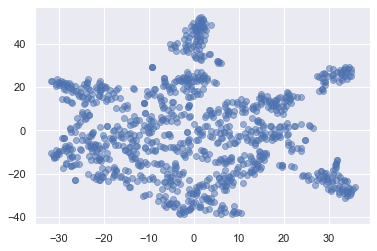

In [276]:
plt.scatter(xs, ys,
            alpha=0.5);

In [281]:
doc_topic_nmf_rich.columns

Index(['blogger_id', 'mundane', 'tech', 'social_bond', 'philosophical',
       'running', 'developer', 'politics', 'faith', 'jargon', 'movie',
       'prime_topic', 'gender', 'age', 'occupation', 'name', 'post',
       'len_post'],
      dtype='object')

In [278]:
doc_topic_nmf_rich = pd.merge(doc_topic_nmf, df,  how='left', left_on='blogger_id', right_on = 'blogger_id')

In [282]:
doc_topic_nmf_rich['xs'] = xs

In [283]:
doc_topic_nmf_rich['ys'] = ys

In [292]:
doc_topic_nmf_rich.columns

Index(['blogger_id', 'mundane', 'tech', 'social_bond', 'philosophical',
       'running', 'developer', 'politics', 'faith', 'jargon', 'movie',
       'prime_topic', 'gender', 'age', 'occupation', 'name', 'post',
       'len_post', 'xs', 'ys'],
      dtype='object')

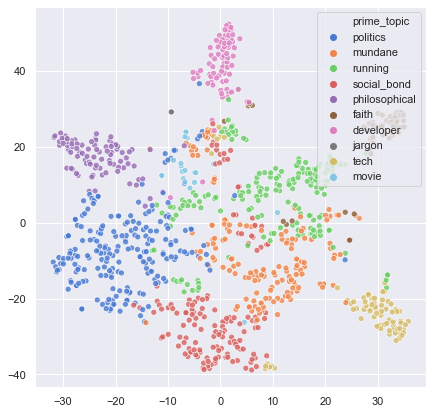

In [285]:

    
plt.figure(figsize=(7,7))
g = sns.scatterplot(
    x=xs, y=ys,
    hue='prime_topic',
    palette=sns.color_palette("muted", 10),
    data=doc_topic_nmf,
    #markers=markers,
    legend="full",
    alpha=0.8
);



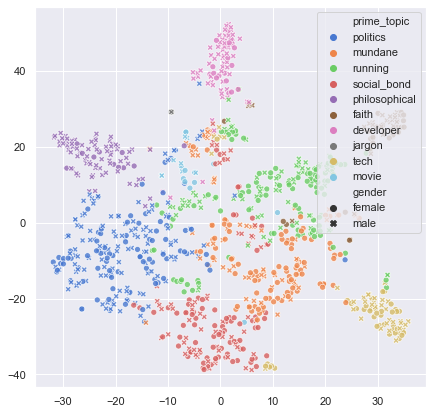

In [286]:
plt.figure(figsize=(7,7))
g = sns.scatterplot(
    x=xs, y=ys,
    hue='prime_topic',
    palette=sns.color_palette("muted", 10),
    data=doc_topic_nmf_rich,
    #markers=markers,
    legend="full",
    style='gender',
    alpha=0.8
);



In [287]:
import plotly.offline as off
off.init_notebook_mode(connected=False)

import plotly.figure_factory as ff
import plotly.graph_objects as go

/Users/elena/opt/anaconda3/lib/python3.7/site-packages/nbformat/notebooknode.py:4: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working



In [291]:
trace = go.Scatter(x=doc_topic_nmf_rich['xs'],
                   y=doc_topic_nmf_rich['ys'],
                   mode='markers')

data = [trace]

layout = dict(
    title = 'My Topic Community',
    yaxis = dict(
        title = 'y'),
    xaxis = dict(
        title = 'x',
        zeroline = False
    )
)
off.plot(dict(data=data, layout=layout))

'temp-plot.html'

In [367]:
trace0 = go.Scatter(x=doc_topic_nmf_rich[doc_topic_nmf_rich['prime_topic'] == 'politics']['xs'],
                   y=doc_topic_nmf_rich[doc_topic_nmf_rich['prime_topic'] == 'politics']['ys'],
                   name='Politics',
                   mode='markers', 
                   marker = dict(size=10, 
                                 color='lightgray',
                                 opacity=0.5),
                   text=doc_topic_nmf_rich['name'],
                   #text2=doc_topic_nmf_rich['occupation'],
                   #text3=doc_topic_nmf_rich['gender'],
                   #text4=doc_topic_nmf_rich['age'],
                   #hovertemplate='<b><i>%{text}</i></b>'
                   #              '<br>Occupation: %{text2}'
                   #              '<br>Gender: %{text3}'
                   #              '<br>Age: %{text4}',
)

trace1 = go.Scatter(x=doc_topic_nmf_rich[doc_topic_nmf_rich['prime_topic'] == 'mundane']['xs'],
                   y=doc_topic_nmf_rich[doc_topic_nmf_rich['prime_topic'] == 'mundane']['ys'],
                   name='Mundane',
                   mode='markers', 
                   marker = dict(size=10, 
                                 color='orange',
                                 opacity=0.5),
                   text=doc_topic_nmf_rich['name'],
                   #text2=doc_topic_nmf_rich['occupation'],
                   #text3=doc_topic_nmf_rich['gender'],
                   #text4=doc_topic_nmf_rich['age'],
                   #hovertemplate='<b><i>%{text}</i></b>'
                   #              '<br>Occupation: %{text2}'
                   #              '<br>Gender: %{text3}'
                   #              '<br>Age: %{text4}',
)

data = [trace0, trace1]

layout = dict(
    title = 'My Topic Community',
    yaxis = dict(
        title = 'y'),
    xaxis = dict(
        title = 'x',
        zeroline = False
    ),
    hovermode='closest'
)
off.plot(dict(data=data, layout=layout))

'temp-plot.html'

In [368]:
trace0 = go.Scatter3d(x=doc_topic_nmf_rich[doc_topic_nmf_rich['prime_topic'] == 'politics']['xs'],
                    y=doc_topic_nmf_rich[doc_topic_nmf_rich['prime_topic'] == 'politics']['ys'],
                    z=doc_topic_nmf_rich[doc_topic_nmf_rich['prime_topic'] == 'politics']['age'],
                    name='Politics',
                    mode='markers', 
                    marker = dict(size=10, color='lightgray', symbol='cross', opacity=0.5),
                    text="My zodiac is " + 
                      doc_topic_nmf_rich['name'].map(str) + 
                      ". I am " + doc_topic_nmf_rich['age'] + 
                      " and " + doc_topic_nmf_rich['gender'] +
                      ". My occupation is " + doc_topic_nmf_rich['occupation'] +
                      ". Search me by my ID " +
                      doc_topic_nmf_rich['blogger_id'],

                    hovertemplate='<b><i>%{text}</i></b>'
)

trace1 = go.Scatter3d(x=doc_topic_nmf_rich[doc_topic_nmf_rich['prime_topic'] == 'mundane']['xs'],
                    y=doc_topic_nmf_rich[doc_topic_nmf_rich['prime_topic'] == 'mundane']['ys'],
                    z=doc_topic_nmf_rich[doc_topic_nmf_rich['prime_topic'] == 'mundane']['age'],
                    name='Mundane',
                    mode='markers', 
                    marker = dict(size=10, color='orange', opacity=0.5),
                    text="My zodiac is " + 
                      doc_topic_nmf_rich['name'].map(str) + 
                      ". I am " + doc_topic_nmf_rich['age'] + 
                      " and " + doc_topic_nmf_rich['gender'] +
                      ". My occupation is " + doc_topic_nmf_rich['occupation'] +
                      ". Search me by my ID " +
                      doc_topic_nmf_rich['blogger_id'],

                    hovertemplate='<b><i>%{text}</i></b>'
)

data = [trace0, trace1]

layout = go.Layout(
    title = 'MY COMMUNITY',
    scene=dict(
    yaxis = dict(
        title = 'y'),
    xaxis = dict(
        title = 'x',
        zeroline = False
    ),
    zaxis = dict(
        title = 'age'
    ),
    hovermode='closest'
))
off.plot(dict(data=data, layout=layout))

'temp-plot.html'

In [348]:
#txt = "My name is {0}, I am a {1} and {2}, search me by my ID {3} ".format(doc_topic_nmf_rich['name'][0], doc_topic_nmf_rich['age'][0], doc_topic_nmf_rich['gender'][0], doc_topic_nmf_rich['blogger_id'][0])
#print(txt.format(id = doc_topic_nmf_rich['blogger_id'][0]))
#txt

In [347]:
#doc_topic_nmf_rich['blogger_id'][0]
#txt1 = "My name is {fname}, I'am {age}".format(fname = "John", age = 36)
#txt2 = "My name is {0}, I'am {1}".format("John",36)